In [29]:
from IPython.display import Image

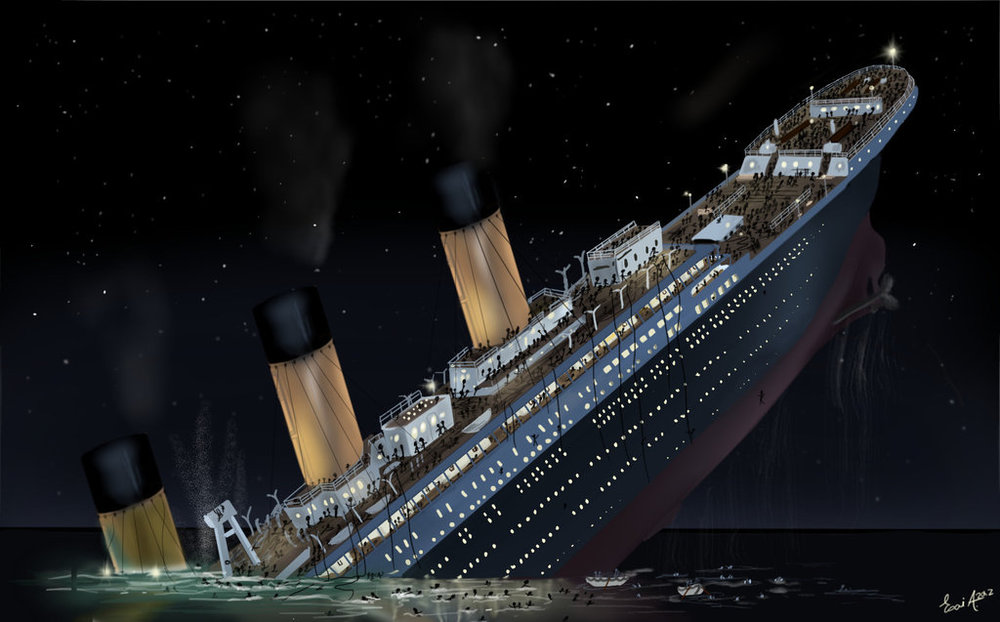

In [31]:
Image(filename="titanic.jpg")

# Import 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure,show 
from seaborn import countplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


# Step 1 - Load Data

In [2]:
Titanic_Data = pd.read_csv("Titanic.csv")


In [3]:
Titanic_Data.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,zero,Pclass,Embarked,Survived
0,1,22.0,7.2500,0,1,0,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,0,3,2.0,0


In [4]:
print("Total number of records are :",len(Titanic_Data))
print("Data Information :",Titanic_Data.info())

Total number of records are : 1309
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   zero         1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Embarked     1307 non-null   float64
 9   Survived     1309 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 102.4 KB
Data Information : None


In [5]:
print("Describe : ",Titanic_Data.describe())

Describe :         Passengerid          Age         Fare          Sex        sibsp  \
count  1309.000000  1309.000000  1309.000000  1309.000000  1309.000000   
mean    655.000000    29.503186    33.281086     0.355997     0.498854   
std     378.020061    12.905241    51.741500     0.478997     1.041658   
min       1.000000     0.170000     0.000000     0.000000     0.000000   
25%     328.000000    22.000000     7.895800     0.000000     0.000000   
50%     655.000000    28.000000    14.454200     0.000000     0.000000   
75%     982.000000    35.000000    31.275000     1.000000     1.000000   
max    1309.000000    80.000000   512.329200     1.000000     8.000000   

             Parch    zero       Pclass     Embarked     Survived  
count  1309.000000  1309.0  1309.000000  1307.000000  1309.000000  
mean      0.385027     0.0     2.294882     1.492731     0.261268  
std       0.865560     0.0     0.837836     0.814626     0.439494  
min       0.000000     0.0     1.000000     0.000

# Step - 2 Analyse the data

Visualization of Servived and non- servived passengers


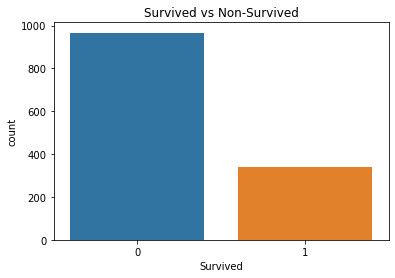

In [6]:
print("Visualization of Servived and non- servived passengers")
figure()
countplot().set_title("Survived vs Non-Survived")
countplot(data=Titanic_Data,x="Survived")
show()

Visualization According to Sex


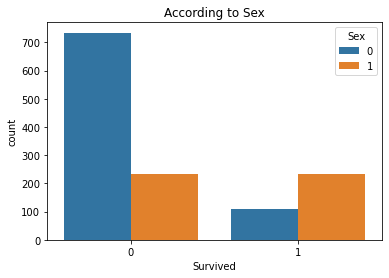

In [8]:
print("Visualization According to Sex")
figure()
countplot().set_title("According to Sex")
countplot(data=Titanic_Data,x="Survived",hue="Sex")
show()

Visualization According to Pclass


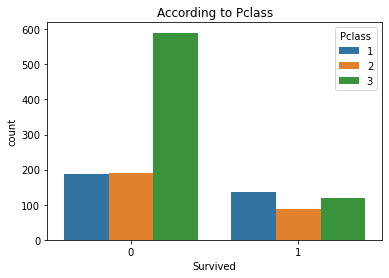

In [9]:
print("Visualization According to Pclass")
figure()
countplot().set_title("According to Pclass")
countplot(data=Titanic_Data,x="Survived",hue="Pclass")
show()

Survived vs Non-Survived based on Age


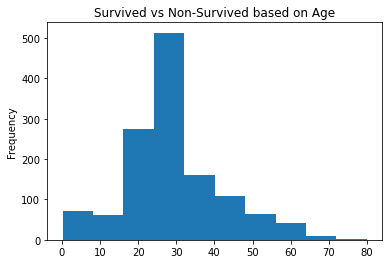

In [10]:
print("Survived vs Non-Survived based on Age")
figure()
Titanic_Data["Age"].plot.hist().set_title("Survived vs Non-Survived based on Age")
show()

# step 3 - cleaning data

In [11]:
Titanic_Data.drop("zero",axis=1,inplace=True)
print("data after column removal")
print(Titanic_Data.head())

data after column removal
   Passengerid   Age     Fare  Sex  sibsp  Parch  Pclass  Embarked  Survived
0            1  22.0   7.2500    0      1      0       3       2.0         0
1            2  38.0  71.2833    1      1      0       1       0.0         1
2            3  26.0   7.9250    1      0      0       3       2.0         1
3            4  35.0  53.1000    1      1      0       1       2.0         1
4            5  35.0   8.0500    0      0      0       3       2.0         0


In [12]:
print("sex column after get_dummies cha use  ")
Sex=pd.get_dummies(Titanic_Data["Sex"])
print(Sex.head())

sex column after get_dummies cha use  
   0  1
0  1  0
1  0  1
2  0  1
3  0  1
4  1  0


In [13]:
Sex=pd.get_dummies(Titanic_Data["Sex"],drop_first=True)
print("sex column after updation")
print(Sex.head())

sex column after updation
   1
0  0
1  1
2  1
3  1
4  0


In [14]:
print("pclass column after get_dummies cha use  ")
pclass=pd.get_dummies(Titanic_Data["Pclass"])
print(pclass.head())

pclass column after get_dummies cha use  
   1  2  3
0  0  0  1
1  1  0  0
2  0  0  1
3  1  0  0
4  0  0  1


In [15]:
Pclass=pd.get_dummies(Titanic_Data["Pclass"],drop_first=True)
print("pclass column after updation")
print(Pclass.head())

pclass column after updation
   2  3
0  0  1
1  0  0
2  0  1
3  0  0
4  0  1


# Concat Sex and Pclass feild in our dataset

In [16]:
Titanic_Data = pd.concat([Titanic_Data,Sex,Pclass],axis=1)
print("Data After Concatantion : ")
print(Titanic_Data.head())

Data After Concatantion : 
   Passengerid   Age     Fare  Sex  sibsp  Parch  Pclass  Embarked  Survived  \
0            1  22.0   7.2500    0      1      0       3       2.0         0   
1            2  38.0  71.2833    1      1      0       1       0.0         1   
2            3  26.0   7.9250    1      0      0       3       2.0         1   
3            4  35.0  53.1000    1      1      0       1       2.0         1   
4            5  35.0   8.0500    0      0      0       3       2.0         0   

   1  2  3  
0  0  0  1  
1  1  0  0  
2  1  0  1  
3  1  0  0  
4  0  0  1  


# Removing unneccessary fields 

In [17]:
Titanic_Data.drop(["Sex","sibsp","Parch","Pclass","Embarked"],axis=1,inplace=True)
print("Data After Column Removation : ")
print(Titanic_Data.head())

Data After Column Removation : 
   Passengerid   Age     Fare  Survived  1  2  3
0            1  22.0   7.2500         0  0  0  1
1            2  38.0  71.2833         1  1  0  0
2            3  26.0   7.9250         1  1  0  1
3            4  35.0  53.1000         1  1  0  0
4            5  35.0   8.0500         0  0  0  1


# Divide dataset into x and yield

In [18]:
x = Titanic_Data.drop("Survived",axis=1)
y = Titanic_Data["Survived"]

# Split the Data for training and testing purpose

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5)
obj = LogisticRegression(max_iter=2000)

# Step 4 - Train the Dataset

In [23]:
obj.fit(x_train,y_train)

LogisticRegression(max_iter=2000)

# Step 5 - Testing

In [24]:
output = obj.predict(x_test)

# Accuracy

In [26]:
print("Accuracy of given Dataset is :")
print(accuracy_score(y_test,output)*100,"%")

Accuracy of given Dataset is :
85.95419847328245 %


# Confusion Matrix

In [27]:
matrix = confusion_matrix(y_test,output)
print("Confusion Matrix",matrix)

Confusion Matrix [[462  22]
 [ 70 101]]
